# **Customer Segmentation using K-Means Clustering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Step 1: Loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv("/content/customer_data.csv")

# Inspect the dataset
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())
print("Summary Statistics:\n", df.describe())

Shape: (200, 5)
Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicate Rows: 0
Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               7

Step 2: Data Preprocessing

In [4]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 3: Determining Optimal Clusters - Elbow Method

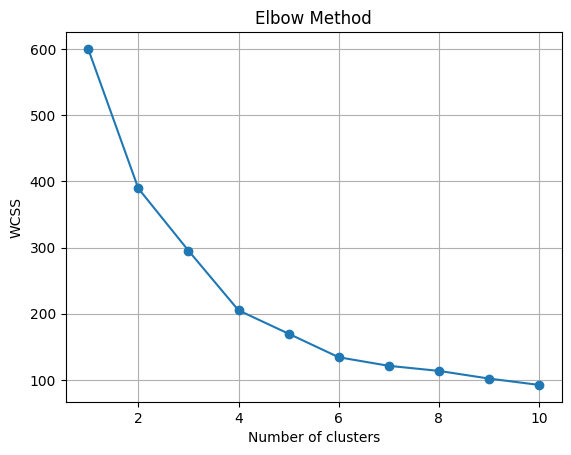

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [6]:
# Now Using Silhouette Scores
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")

Silhouette Score for 2 clusters: 0.335
Silhouette Score for 3 clusters: 0.358
Silhouette Score for 4 clusters: 0.404
Silhouette Score for 5 clusters: 0.408
Silhouette Score for 6 clusters: 0.431
Silhouette Score for 7 clusters: 0.410
Silhouette Score for 8 clusters: 0.367
Silhouette Score for 9 clusters: 0.374
Silhouette Score for 10 clusters: 0.362


From the Elbow method and Silhouette Score, we get to know that optimal number of clusters is 6.

Step 4: Apply K-Means Clustering (using 6 clusters)

In [7]:
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Step 5a: 2D Scatter Plot using PCA

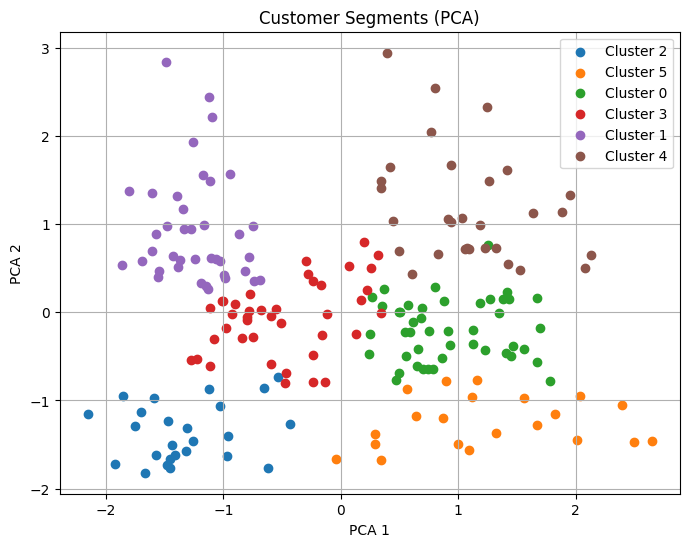

In [8]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(8,6))
for c in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == c]['PCA1'], df[df['Cluster'] == c]['PCA2'], label=f'Cluster {c}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments (PCA)')
plt.legend()
plt.grid(True)
plt.show()

Step 5b: Pair Plot

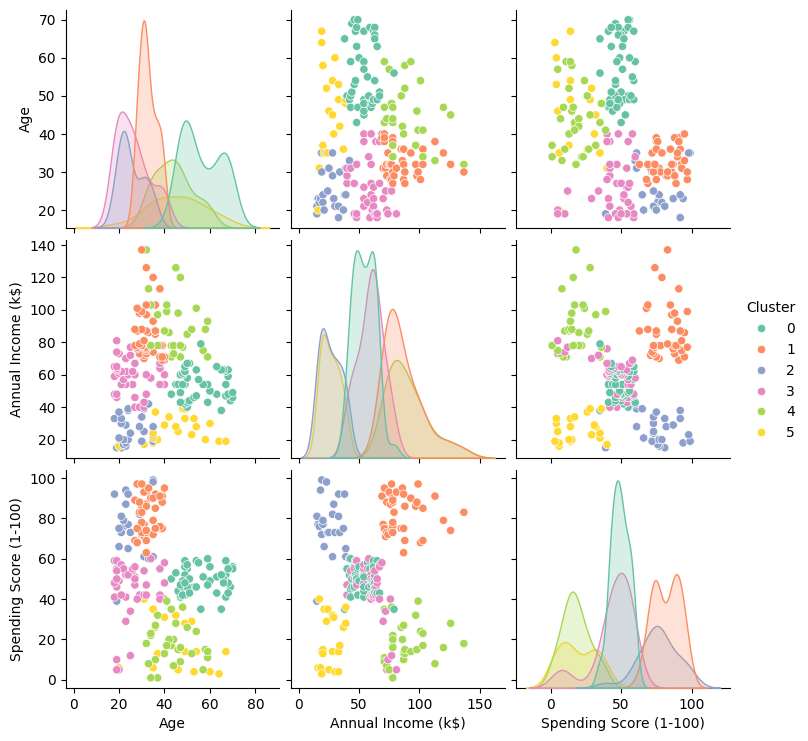

In [10]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='Set2')
plt.show()

Step 5c: Cluster Centroids (in original scale)

In [13]:
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
centroid_df = pd.DataFrame(centroids_original, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroid_df

,Age,Annual Income (k$),Spending Score (1-100)
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


### **Insights:**

* **Cluster 1: Prime Spenders**
    * **Characteristics:** High Income, High Spending.
    * **Action:** Target with premium products and loyalty programs.

* **Cluster 2: Young & Eager**
    * **Characteristics:** Low Income, High Spending.
    * **Action:** Target with social media ads for trendy, affordable items and discounts.

* **Cluster 4: Cautious & Wealthy**
    * **Characteristics:** High Income, Low Spending.
    * **Action:** Lower priority; market based on product quality, not sales.

* **Cluster 0: Steady Consumers**
    * **Characteristics:** Older, with moderate income and spending.
    * **Action:** Engage with marketing that focuses on reliability and customer service.

* **Cluster 3: Young & Standard**
    * **Characteristics:** Young, with moderate income and spending.
    * **Action:** Include in general marketing campaigns.

* **Cluster 5: Cautious & Low-Income**
    * **Characteristics:** Low Income, Low Spending.
    * **Action:** Lowest priority; do not focus marketing efforts here.